Recommender System is a software system that provides specific suggestions to users according to their preferences

#### Types of Recommendation system:
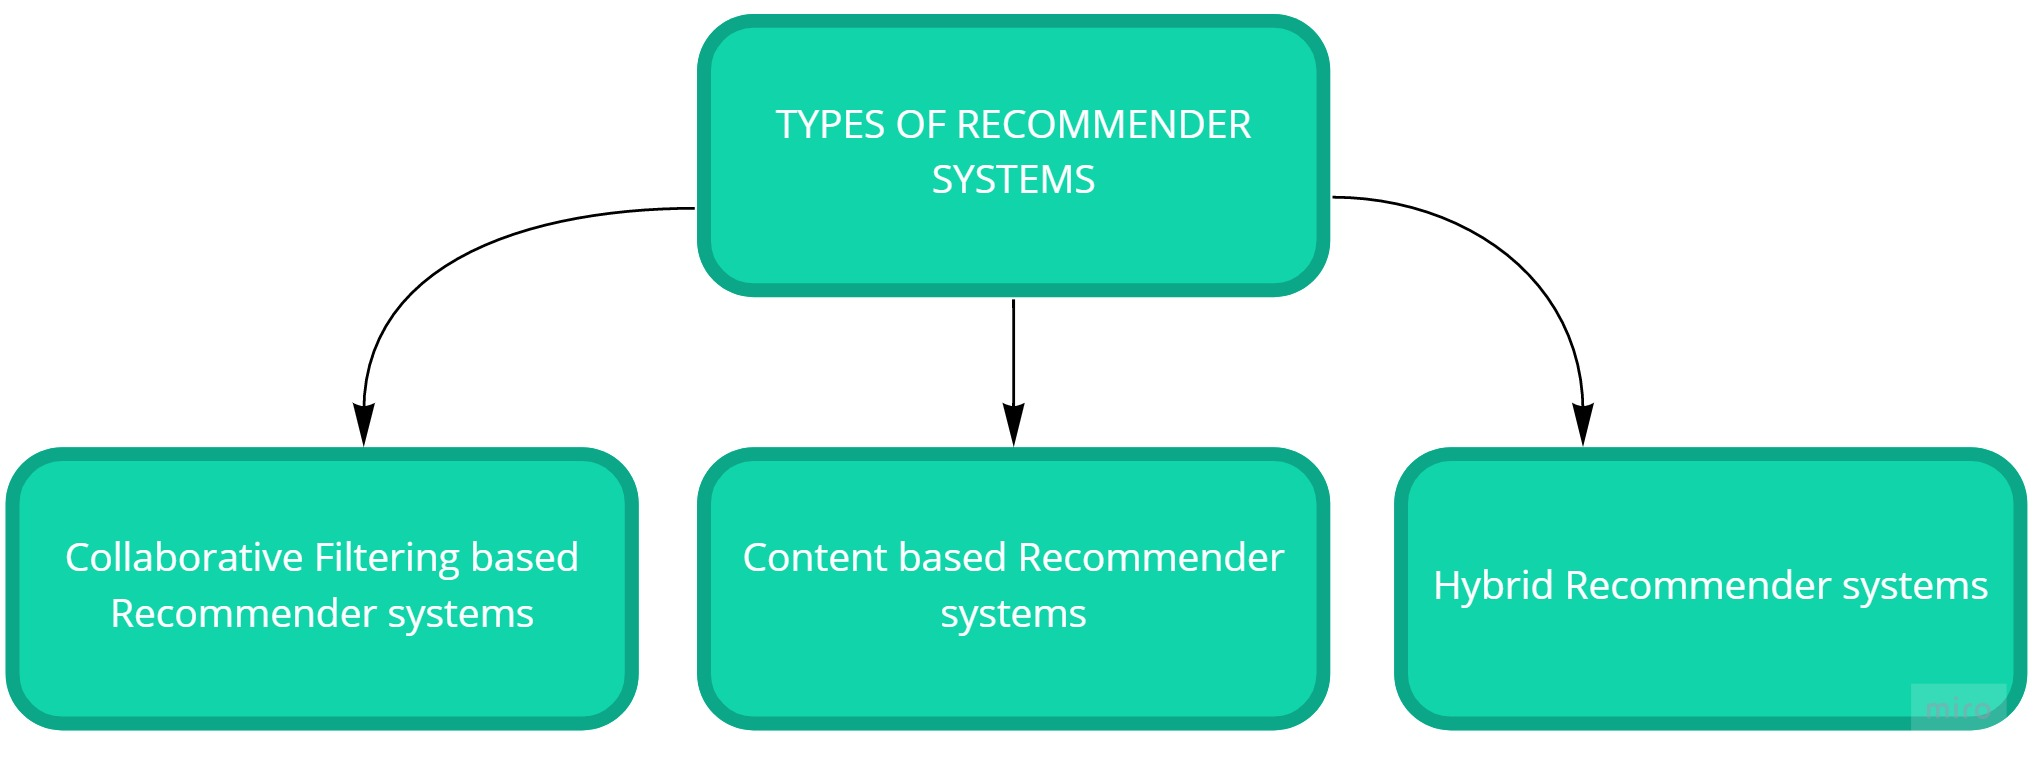

#### Content based:

The system focuses on the properties of the items to be suggested to the users. For example, if a YouTube user has watched comedy videos then the system will recommend comedy genre videos to him. Similarly, if a Netflix user has watched movies of a particular director then the system will recommend those movies to him.

In this type of recommendation system, relevant items are shown using the content of the previously searched items by the users. Here content refers to the attribute/tag of the product that the user like.

###### collaborative-filtering:
It tries to find similarities between users or between items based on recorded user-item preferences or ratings.
Recommending the new items to users based on the interest and preference of other similar users is basically collaborative-based filtering. For eg:- When we shop on Amazon it recommends new products saying “Customer who brought this also brought” as shown below.
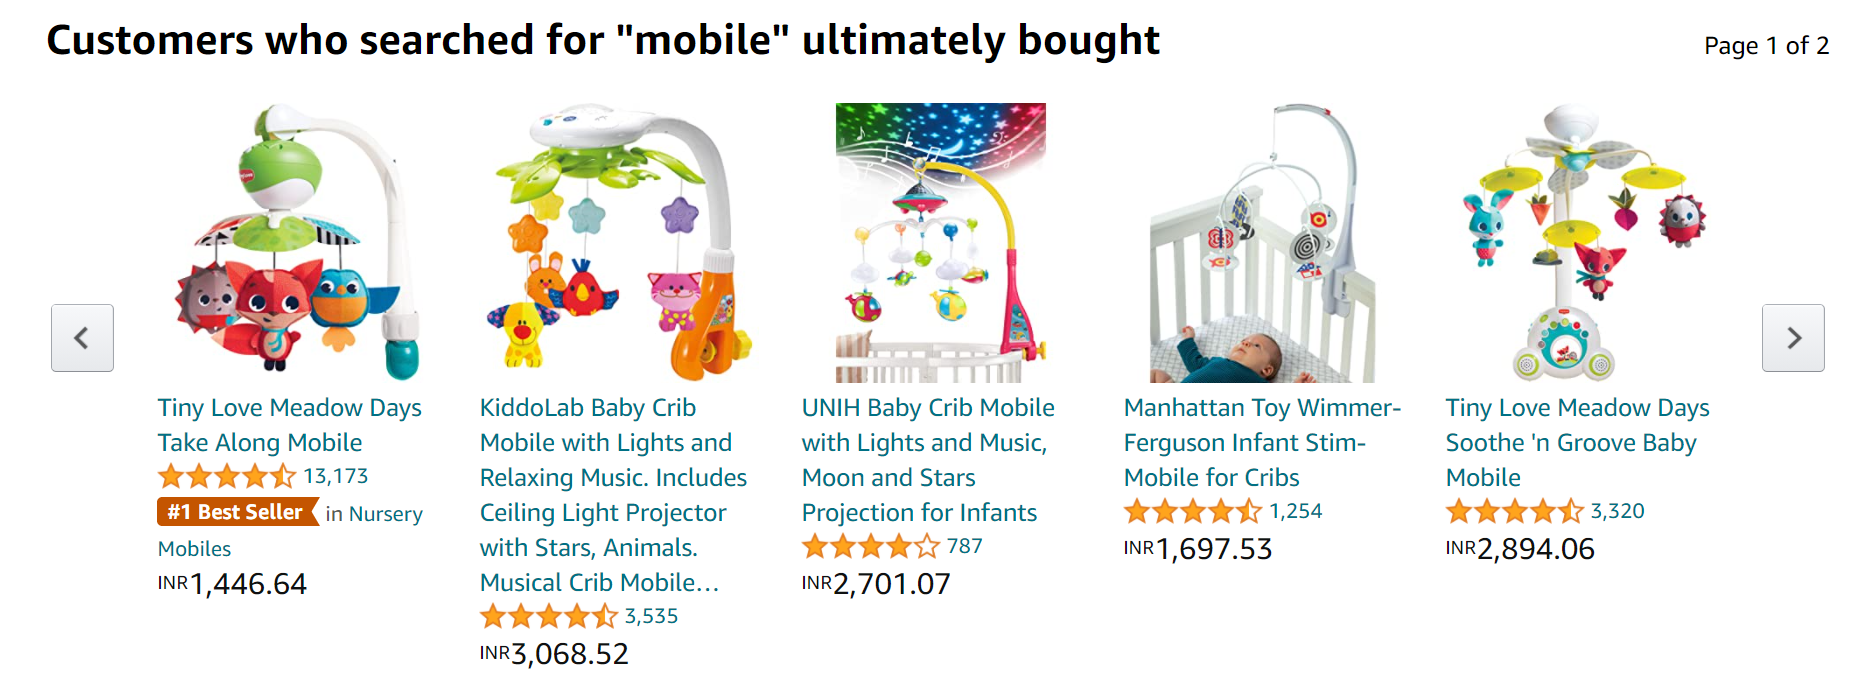


Divided into two categories:

###### i) user-based collaborative filtering– The recommender system tries to find out similar users to the target user by calculating certain similarity measures and then suggest items to the target user based on similar user preferences. Similarity calculation is an important task here.
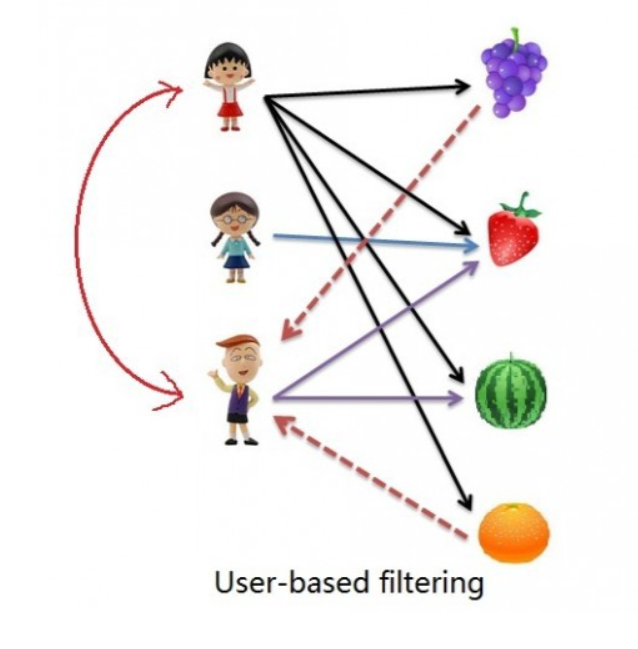
ii.) item-based collaborative filtering– The recommender system tries to find out items based
on previous user preferences of the user and then recommend similar items to
the user. These items might be of interest to the user.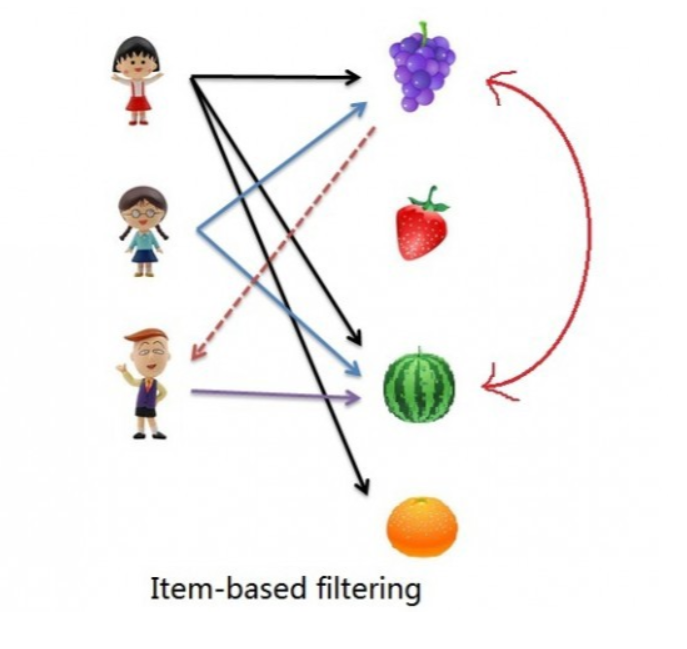

### Implementation
MovieLens dataset

 It consists of:

100,000 ratings (1-5) from 943 users on 1682 movies.

Each user has rated at least 20 movies.

Simple demographic info for the users (age, gender, occupation, zip)

Genre information of movies


In [3]:
import pandas as pd
import os
# pass in column names for each CSV and read them using pandas. 
# Column names available in the readme file
os.chdir("D://Files")
#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,
 encoding='latin-1')

#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,
 encoding='latin-1')

#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols,
 encoding='latin-1')

In [5]:
print (users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
print (ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
#Items

In [7]:
print (items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

### SVD
##### Singular Value Decomposition (SVD) based Movie Recommendation

In [1]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.io.parsers.read_csv('data/ratings.dat', 
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')

movie_data = pd.io.parsers.read_csv('data/movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::')